In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

In [ ]:
data_set = pd.read_csv("consolidated_aras_dataset.csv")

In [ ]:
data_set.head()

,Photocell_1,Photocell_2,IR_1,Force_Sensor_1,Force_Sensor_2,Distance_Sensor_3,Distance_Sensor_4,Photocell_3,Photocell_4,Photocell_5,...,Contact_Sensor_3,Sonar_1,Sonar_2,Distance_Sensor_2,Distance_Sensor_3.1,Tempurature_1,Force_Sensor_3,Resident_A,Resident_B,House
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,11,11,B
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,11,11,B
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,11,11,B
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,11,11,B
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,11,11,B


In [ ]:
temp = data_set.Resident_A.unique()
temp

array([11, 15,  1,  3,  4,  9, 25, 13,  5,  6, 10, 12, 14, 27,  2, 21,  7,
       22, 18,  8, 17, 19, 23, 24, 16, 26])

In [ ]:
data_set.Resident_A.replace()

0          11
1          11
2          11
3          11
4          11
           ..
5183995    12
5183996    12
5183997    12
5183998    12
5183999    12
Name: Resident_A, Length: 5184000, dtype: int64

In [ ]:
data_set.head()

,Photocell_1,Photocell_2,IR_1,Force_Sensor_1,Force_Sensor_2,Distance_Sensor_3,Distance_Sensor_4,Photocell_3,Photocell_4,Photocell_5,...,Contact_Sensor_3,Sonar_1,Sonar_2,Distance_Sensor_2,Distance_Sensor_3.1,Tempurature_1,Force_Sensor_3,Resident_A,Resident_B,House
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,11,11,B
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,11,11,B
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,11,11,B
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,11,11,B
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,11,11,B


In [ ]:
data_set_a = data_set[data_set["House"] == "A"]
data_set_b = data_set[data_set["House"] == "B"]

In [ ]:
data_set_a.drop(columns =["House","Resident_B"], inplace = True)
data_set_b.drop(columns =["House","Resident_A"], inplace = True)

<ipython-input-10-8426114e707b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set_a.drop(columns =["House","Resident_B"], inplace = True)
<ipython-input-10-8426114e707b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set_b.drop(columns =["House","Resident_A"], inplace = True)


In [ ]:
data_set_a.head()

,Photocell_1,Photocell_2,IR_1,Force_Sensor_1,Force_Sensor_2,Distance_Sensor_3,Distance_Sensor_4,Photocell_3,Photocell_4,Photocell_5,...,Contact_Sensor_1,Contact_Sensor_2,Contact_Sensor_3,Sonar_1,Sonar_2,Distance_Sensor_2,Distance_Sensor_3.1,Tempurature_1,Force_Sensor_3,Resident_A
2592000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
2592001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
2592002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
2592003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
2592004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12


In [ ]:
from sklearn.model_selection import train_test_split

# Split into X (features) and y (target)
X = data_set_a.drop('Resident_A', axis=1)
y = data_set_a['Resident_A']
num_classes = len(y.unique())

In [ ]:
num_classes = 28

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Y_train = to_categorical(y=np.array(y_train).reshape(-1,1),num_classes=num_classes)

In [ ]:
# Define the architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 28)                924       
                                                                 
Total params: 4,348
Trainable params: 4,348
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
64800/64800 [==============================] - 130s 2ms/step - loss: 1.2742 - accuracy: 0.6428
Epoch 2/10
64800/64800 [==============================] - 130s 2ms/step - loss: 1.2572 - accuracy: 0.6456
Epoch 3/10
64800/64800 [==============================] - 127s 2ms/step - loss: 1.2545 - accuracy: 0.6459
Epoch 4/10
64800/64800 [==============================] - 130s 2ms/step - loss: 1.2529 - accuracy: 0.6459
Epoch 5/10
64800/64800 [==============================] - 130s 2ms/step - loss: 1.2521 - accuracy: 0.6459
Epoch 6/10
64800/64800 [==============================] - 129s 2ms/step - loss: 1.2514 - accuracy: 0.6462
Epoch 7/10
64800/64800 [==============================] - 129s 2ms/step - loss: 1.2510 - accuracy: 0.6462
Epoch 8/10
64800/64800 [==============================] - 129s 2ms/step - loss: 1.2506 - accuracy: 0.6462
Epoch 9/10
64800/64800 [==============================] - 128s 2ms/step - loss: 1.2505 - accuracy: 0.6463
Epoch 10/10
64800/64800 [=====================

In [ ]:
y_test

3720650    22
4749233     2
2667670     7
5142086    12
5072067     5
           ..
3284914    12
4123831     6
3963892     2
3115255    17
4002174    11
Name: Resident_A, Length: 518400, dtype: int64

In [ ]:
y_pred = model.predict(X_test)

16200/16200 [==============================] - 24s 1ms/step


In [ ]:
y_pred_class = np.argmax(y_pred,axis=1).reshape(-1,1)
y_pred_class





array([[11],
       [ 2],
       [ 2],
       ...,
       [ 2],
       [ 8],
       [11]])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix for House B'):
    plt.figure(figsize=(14, 10)) 
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


In [ ]:
class_names = np.arange(1,24)

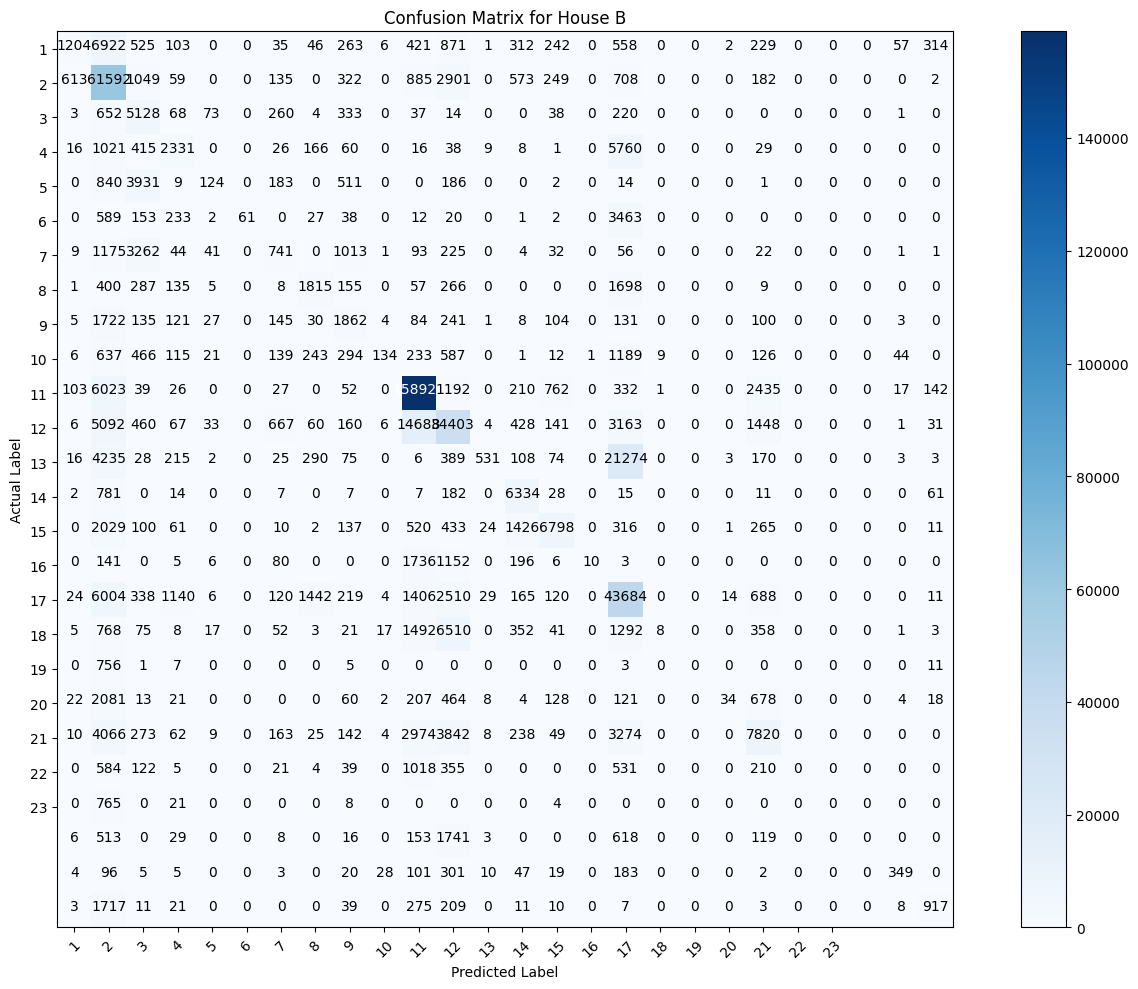

In [ ]:
cm = confusion_matrix(y_test, y_pred_class)
plot_confusion_matrix(cm, class_names)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_class))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.59      0.10      0.17     12111
           2       0.55      0.89      0.68     69270
           3       0.30      0.75      0.43      6831
           4       0.47      0.24      0.31      9896
           5       0.34      0.02      0.04      5801
           6       1.00      0.01      0.03      4601
           7       0.26      0.11      0.15      6720
           8       0.44      0.38      0.40      4836
           9       0.32      0.39      0.35      4723
          10       0.65      0.03      0.06      4257
          11       0.86      0.93      0.89    170281
          12       0.58      0.57      0.57     60858
          13       0.85      0.02      0.04     27447
          14       0.61      0.85      0.71      7449
          15       0.77      0.56      0.65     12133
          16       0.91      0.00      0.01      3335
          17       0.49      0.75      0.60     57924
          18       0.44    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split

# Split into X (features) and y (target)
X = data_set_b.drop('Resident_B', axis=1)
y = data_set_b['Resident_B']
num_classes =28

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Y_train = to_categorical(y=np.array(y_train).reshape(-1,1),num_classes=num_classes)

In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
64800/64800 [==============================] - 137s 2ms/step - loss: 0.3387 - accuracy: 0.9131
Epoch 2/10
64800/64800 [==============================] - 135s 2ms/step - loss: 0.3316 - accuracy: 0.9138
Epoch 3/10
64800/64800 [==============================] - 135s 2ms/step - loss: 0.3312 - accuracy: 0.9139
Epoch 4/10
64800/64800 [==============================] - 135s 2ms/step - loss: 0.3310 - accuracy: 0.9139
Epoch 5/10
64800/64800 [==============================] - 136s 2ms/step - loss: 0.3309 - accuracy: 0.9140
Epoch 6/10
64800/64800 [==============================] - 136s 2ms/step - loss: 0.3309 - accuracy: 0.9139
Epoch 7/10
64800/64800 [==============================] - 137s 2ms/step - loss: 0.3309 - accuracy: 0.9139
Epoch 8/10
64800/64800 [==============================] - 137s 2ms/step - loss: 0.3309 - accuracy: 0.9140
Epoch 9/10
64800/64800 [==============================] - 143s 2ms/step - loss: 0.3309 - accuracy: 0.9140
Epoch 10/10
64800/64800 [=====================

In [ ]:
y_pred = model.predict(X_test)

16200/16200 [==============================] - 27s 2ms/step


In [ ]:
y_pred_class = np.argmax(y_pred,axis=1).reshape(-1,1)
y_pred_class

array([[11],
       [ 2],
       [ 2],
       ...,
       [ 2],
       [12],
       [11]])

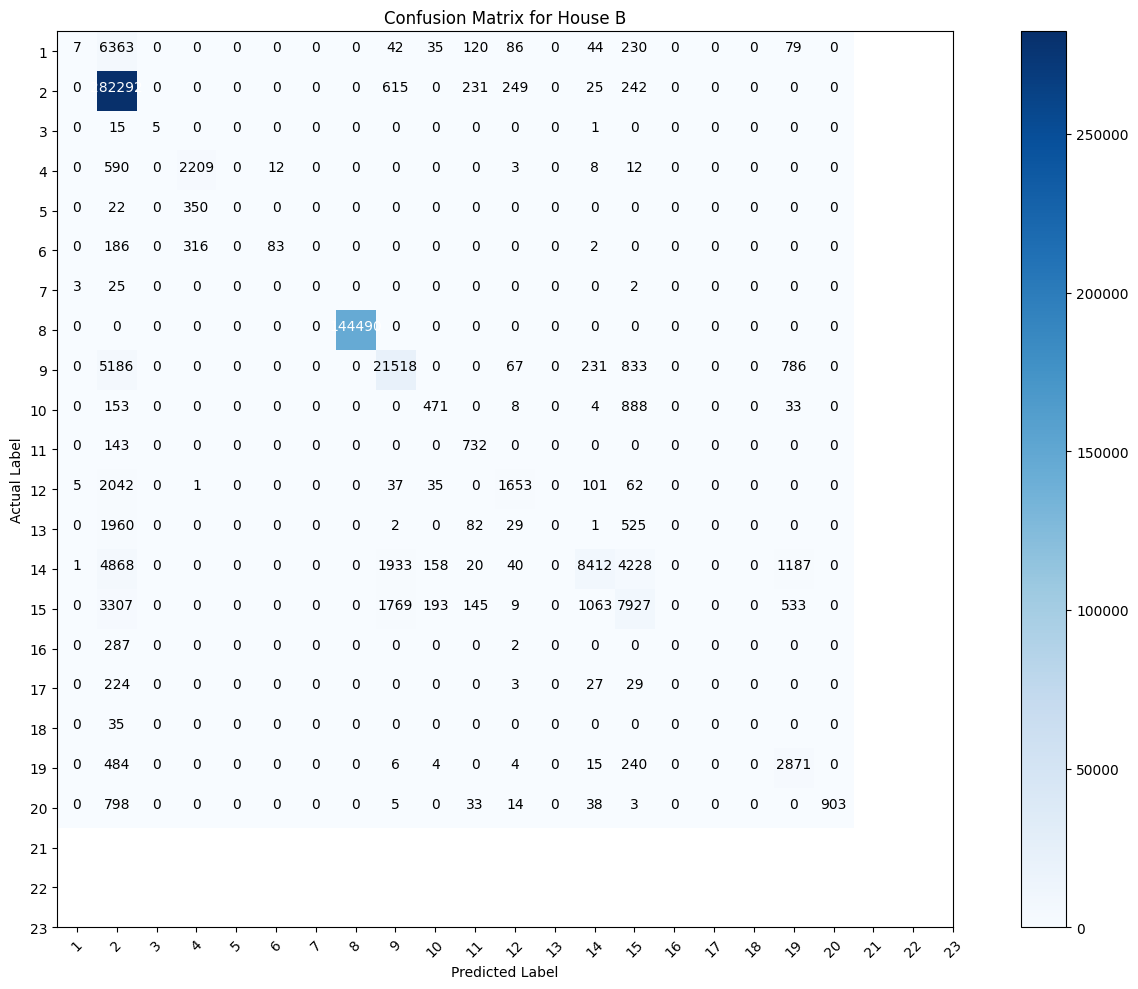

In [ ]:
cm = confusion_matrix(y_test, y_pred_class)
plot_confusion_matrix(cm, class_names)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_class))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.44      0.00      0.00      7006
           2       0.91      1.00      0.95    283654
           3       1.00      0.24      0.38        21
           4       0.77      0.78      0.77      2834
           6       0.00      0.00      0.00       372
           8       0.87      0.14      0.24       587
          10       0.00      0.00      0.00        30
          11       1.00      1.00      1.00    144490
          12       0.83      0.75      0.79     28621
          13       0.53      0.30      0.38      1557
          14       0.54      0.84      0.65       875
          15       0.76      0.42      0.54      3936
          16       0.00      0.00      0.00      2599
          17       0.84      0.40      0.55     20847
          18       0.52      0.53      0.53     14946
          20       0.00      0.00      0.00       289
          21       0.00      0.00      0.00       283
          22       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
